# Part II - (Presentation Title)
## by (your name here)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df_work = pd.read_csv('cleaned_dataset.csv')
df_work.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,user_type,member_gender,bike_share_for_all_trip,start_day,distance,age,age_group,duration_split
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,Customer,Male,No,28,0.338829,34,20-40,max_duration
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,Customer,Male,No,28,1.682328,46,41-60,max_duration
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,Subscriber,Other,No,28,0.162189,29,20-40,max_duration
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,Subscriber,Male,Yes,28,1.498675,44,41-60,max_duration
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,323,Subscriber,Male,No,28,2.072755,59,41-60,max_duration


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

>The increase of duration with distance is clear across age_groups is clearly visible. And also the trend where the least distances covered per duration are the age groups <20 and >60 is represented in this graph.

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

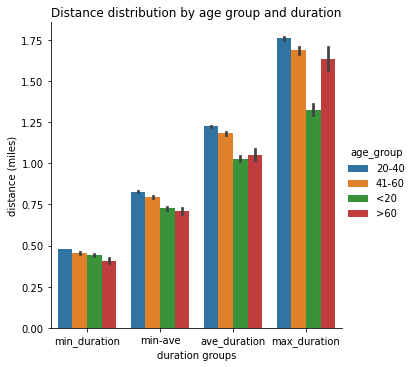

In [6]:
dats = df_work[df_work['distance'] < 40]#To take care of outliers that will skew the result
sb.catplot(data = dats, x = 'duration_split', y='distance',hue='age_group', kind = 'bar',order=['min_duration','min-ave','ave_duration','max_duration']);
plt.xlabel('duration groups')
plt.ylabel('distance (miles)');
plt.title('Distance distribution by age group and duration');

## (Visualization 2)

> Average duration of the subcribers is lower than those of customers across all ages even though there are more subscibers than customers.

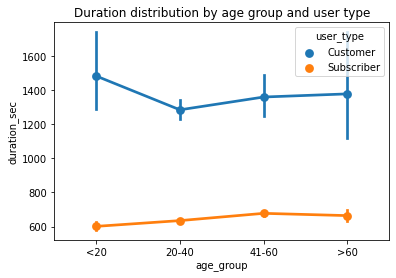

In [8]:
sb.pointplot(data = df_work , x='age_group',y = 'duration_sec', hue = 'user_type',order=['<20','20-40','41-60','>60']);
plt.title('Duration distribution by age group and user type');

## (Visualization 3)
> The plot below can be devided into four quadrants, at the top left we have low duration and high distance, to right is the high duration and large distance, the bottom left is the low duration and small distance and the bottom right with large duration and small distance. Firstly we see that subscribers have the least duration and so are on the left and customers the most duration on the right. The trend of the age groups >60 and < 20 is clear with both covering the least distance in both cases of customers and subscribers.


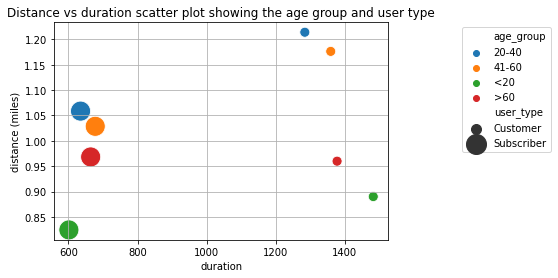

In [10]:
dats = df_work.groupby(['age_group','user_type']).mean().reset_index()
sb.scatterplot(data = dats, x ='duration_sec',y = 'distance',hue = 'age_group',size = 'user_type',sizes = [100,400])
plt.legend(bbox_to_anchor=(1.5,1))
plt.xlabel('duration')
plt.ylabel('distance (miles)')
plt.title('Distance vs duration scatter plot showing the age group and user type');
plt.grid()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 